# Scenario Discovery

In the case of Ijssel River model, this step of MORDM is modified to prioritize a small number of scenarios in order to filter the scenario based on the goals (Eker & Kwakkel, 2018). We employ the patient rule-induction method (PRIM) to identify a bounding subspace within the uncertainty space, which we refer to as the "subspace of concern." This subspace is a region within the uncertainty space that is likely to yield undesirable results according to our transport company's objectives.

Initially, we will filter out some of the less relevant results and visually inspect the remaining ones to gain insights. Following this, we will apply the PRIM algorithm to identify the subspace of concern and analyze the significance of its boundaries. Lastly, we will save the subset of scenarios from the original experiments that fall within this identified subspace. These scenarios will be used in the [3.b. scenario_diversity_evaluation.py](3.b.%20scenario_diversity_evaluation.py) file to select a diverse set of four scenarios of concern, under which we can search for optimal policies.

For our transport company, it is crucial to understand the conditions under which transportation along the IJssel River might be disrupted. Identifying these "scenarios of concern" allows us to proactively develop policies that ensure the continuity and reliability of our operations, despite the uncertainties present in the environment.

-------------------
## 0. Imports and Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting, prim
from problem_formulation import get_model_for_problem_formulation

In [2]:
dike_model, planning_steps = get_model_for_problem_formulation('All Dikes')

We will use the results from our base case experiments, where we ran the base case under 10,000 scenarios sampled by the ema_workbench's Latin Hypercube sampler.

In [3]:
# Load the results of the base case experiments from the specified tar.gz file
results = load_results('./output/results_base_case.tar.gz')

In [4]:
# Unpack the loaded results into separate variables for experiments and outcomes
experiments, outcomes = results

In [5]:
# Convert the outcomes dictionary to a DataFrame and display the first few rows
outcomes = pd.DataFrame(outcomes)
outcomes.head()

,A1_Expected_Annual_Damage,A1_Dike_Investment_Costs,A1_Expected_Number_of_Deaths,A2_Expected_Annual_Damage,A2_Dike_Investment_Costs,A2_Expected_Number_of_Deaths,A3_Expected_Annual_Damage,A3_Dike_Investment_Costs,A3_Expected_Number_of_Deaths,A4_Expected_Annual_Damage,A4_Dike_Investment_Costs,A4_Expected_Number_of_Deaths,A5_Expected_Annual_Damage,A5_Dike_Investment_Costs,A5_Expected_Number_of_Deaths,RfR Total Costs,Total_Expected_Annual_Damage,Total_Dike_Investment_Costs,Total_Expected_Number_of_Deaths
0,0.000000e+00,0,0.000000,6.808979e+06,0,0.009542,4.764668e+08,0,1.158927,5.416627e+07,0,0.033860,0.0,0,0.0,0.0,5.374421e+08,0,1.202328
1,3.392940e+09,0,1.808663,2.992853e+07,0,0.021521,3.049516e+08,0,0.414365,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,3.727820e+09,0,2.244549
2,2.772071e+09,0,1.798056,0.000000e+00,0,0.000000,2.943494e+08,0,0.495087,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,3.066420e+09,0,2.293143
3,2.148576e+09,0,1.778797,1.668634e+08,0,0.186815,1.475651e+09,0,3.053862,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,3.791091e+09,0,5.019474
4,0.000000e+00,0,0.000000,3.878131e+07,0,0.035199,0.000000e+00,0,0.000000,5.804320e+07,0,0.025694,0.0,0,0.0,0.0,9.682451e+07,0,0.060893


In [6]:
# Convert the experiments dictionary to a DataFrame and display the first few rows
experiments = pd.DataFrame(experiments)
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,27,109.980421,10.0,0.949842,113.333813,10.0,0.987398,102.837734,1.0,0.371209,...,0,0,0,0,0,0,0,0,Base Case,dikesnet
1,69,167.755342,1.5,0.095852,258.851784,10.0,0.234429,239.613433,10.0,0.182672,...,0,0,0,0,0,0,0,1,Base Case,dikesnet
2,71,121.808348,1.5,0.017500,339.112507,10.0,0.848583,79.000247,1.5,0.224383,...,0,0,0,0,0,0,0,2,Base Case,dikesnet
3,6,55.474135,10.0,0.314805,108.932171,1.0,0.164041,254.582802,1.0,0.056785,...,0,0,0,0,0,0,0,3,Base Case,dikesnet
4,55,151.181600,10.0,0.973067,247.770981,1.0,0.642211,203.340595,1.5,0.985939,...,0,0,0,0,0,0,0,4,Base Case,dikesnet


In [7]:
# Select columns from the experiments DataFrame, from the 2nd to the 18th column (excluding the first column), and assign them to x
x = experiments.iloc[:, 1:18]

In [8]:
# Select the 17th column from the outcomes DataFrame and convert it to a NumPy array, assigning it to y
y = outcomes.iloc[:, 16].values

In [9]:
# Include dependencies
import ema_workbench
import inspect

# List all modules and submodules in ema_workbench
for name, obj in inspect.getmembers(ema_workbench):
    if inspect.ismodule(obj):
        print(name)

# List all attributes in the `analysis` module to check for rule induction types
import ema_workbench.analysis as analysis
print(dir(analysis))

analysis
em_framework
ema_logging
util
['CART', 'Density', 'DiagKind', 'Logit', 'PlotType', 'Prim', 'RuleInductionType', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'b_and_w_plotting', 'cart', 'envelopes', 'feature_scoring', 'get_ex_feature_scores', 'get_feature_scores_all', 'get_rf_feature_scores', 'get_univariate_feature_scores', 'kde_over_time', 'lines', 'logistic_regression', 'multiple_densities', 'pairs_plotting', 'pca_preprocess', 'plotting', 'plotting_util', 'prim', 'prim_util', 'run_constrained_prim', 'scenario_discovery_util', 'set_fig_to_bw', 'setup_cart', 'setup_prim']


In [10]:
# Include dependency
from ema_workbench.analysis import prim

# Inspect sdutil
print("\nAttributes in sdutil:")
sdutil_attributes = [name for name, obj in inspect.getmembers(prim.sdutil)]
print(sdutil_attributes)



Attributes in sdutil:
['COLOR_LIST', 'OutputFormatterMixin', 'RuleInductionType', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_calculate_quasip', '_compare', '_determine_nr_restricted_dims', '_determine_restricted_dims', '_get_sorted_box_lims', '_in_box', '_make_box', '_normalize', '_setup', '_setup_figure', 'abc', 'enum', 'host_subplot', 'itertools', 'make_legend', 'mpl', 'np', 'patches', 'pd', 'plot_box', 'plot_boxes', 'plot_pair_wise_scatter', 'plot_ppt', 'plot_tradeoff', 'plot_unc', 'plt', 'sns', 'sp']


In [11]:
# Include dependencies
import numpy as np
import pandas as pd
from ema_workbench.analysis import prim

# Use RuleInductionType from sdutil
rule_induction_type = prim.sdutil.RuleInductionType

# Example data: replace these with your actual data
x = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100)
})

# Example binary target variable
y = pd.Series(np.random.randint(0, 2, size=100))

# Determine if y is binary or continuous
if set(y) == {0, 1}:
    y_mode = rule_induction_type.BINARY
else:
    y_mode = rule_induction_type.REGRESSION

# Pass the parameters to PRIM and run PRIM
prim_alg = prim.Prim(x, y, threshold=0.5, peel_alpha=0.1, mode=y_mode)

# Find the box
box = prim_alg.find_box()

# Print box details to verify
print(box)


---------------------------------------

## 1. Visual Analysis

Before running PRIM, we can gain valuable insights into how the scenarios we executed varied within our outcome space. Since PRIM relies on binary classification of experiments based on outcomes, it is crucial to understand what factors contribute to an experiment being classified as a "worst case".

In our analysis, outcomes related to all dikes remain our primary focus as they directly impact our goals. Through this analysis, we will identify and establish the performance threshold that will classify experiments as either failures or successes for the PRIM algorithm.

In [12]:
# Define a list of outcomes of interest and select the first outcome as the primary outcome of interest
outcomes_of_interest = ['Total_Expected_Annual_Damage', 'Total_Expected_Number_of_Deaths']
ooi = outcomes_of_interest[0]

In [13]:
# Set the seaborn style to 'white' for the plot aesthetics
sns.set_style('white')

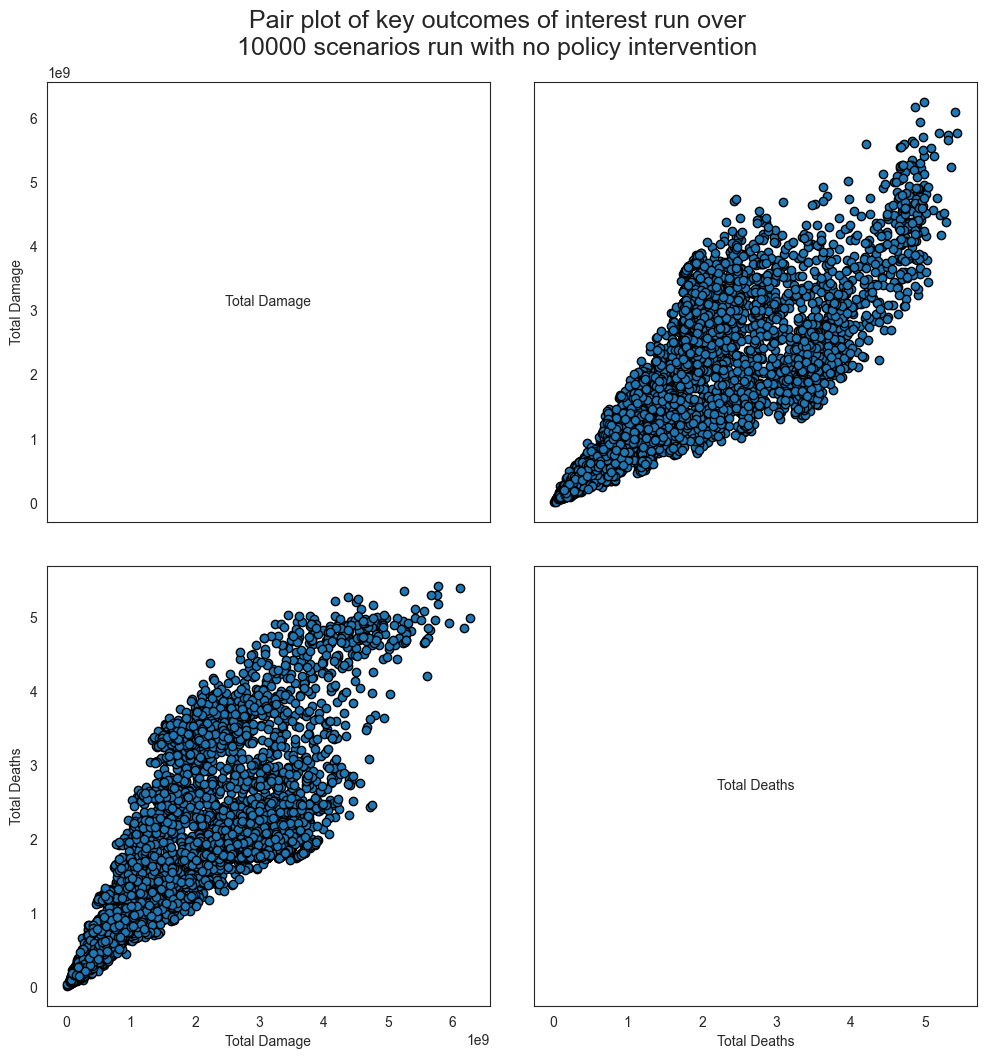

In [14]:
# Subset & rename data columns for readability
outcomes_subset = {k:outcomes[k] for k in outcomes_of_interest if k in outcomes}

ylabels = {
    'Total_Expected_Annual_Damage'      : 'Total Damage',
    'Total_Expected_Number_of_Deaths'   : 'Total Deaths'
}

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes_subset,
                                         legend=True, ylabels=ylabels,
                                         linewidth=0,
                                        )

# Graph settings
fig.set_size_inches(12, 12)
fig.suptitle("Pair plot of key outcomes of interest run over\n"
             + "10000 scenarios run with no policy intervention",
             fontsize=18, y=0.94)
plt.savefig('./img/scenario_discovery__outcomes_pairplot.png')
plt.show()

As expected, there are strong correlations between deaths and damages. 

To further explore this, we can plot the cumulative distribution functions (CDFs) for each outcome of interest. For reference, we'll mark the 90th percentile of each distribution within our remaining ~10,000 scenarios. This will give us an idea of what constitutes "worst case" for each outcome: for each outcome of interest, only 10% of scenarios perform worse than the threshold indicated in the following plots.

In [15]:
# Set the seaborn style to 'darkgrid' for the plot aesthetics
sns.set_style('darkgrid')

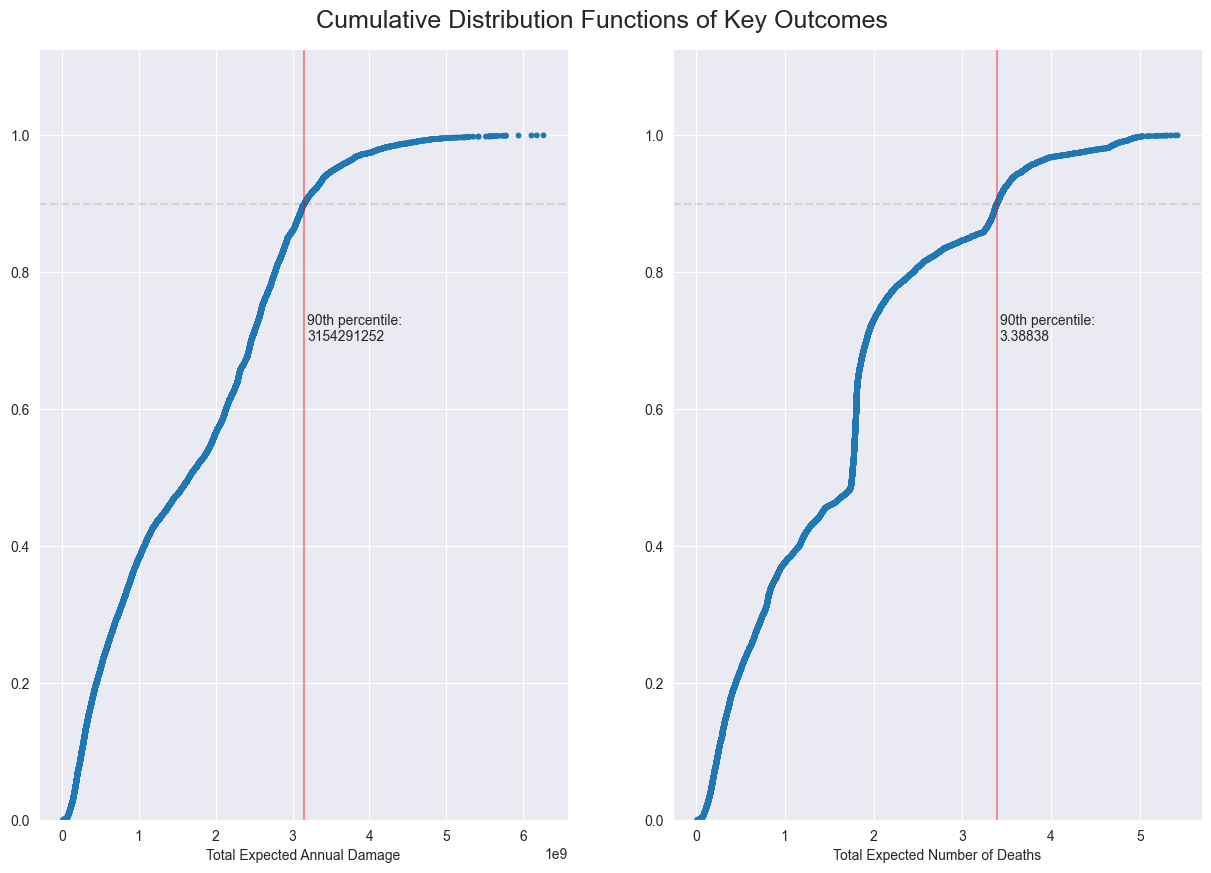

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of scenarios and initialize performance threshold
N = experiments.shape[0]
performance_threshold = None

# Create subplots for cumulative distribution functions
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
for col, ax in zip(outcomes_of_interest, axs.ravel()):
    # Build data for plotting
    df = pd.DataFrame()
    df[col] = outcomes[col]
    df['policy'] = experiments['policy']
    df = df.sort_values(by=col, ascending=True)
    df['y'] = np.arange(N)/N
    df = df.reset_index()
    
    # Plot
    sns.scatterplot(data=df, x=col, y='y', hue='policy',
                    legend=False, size=1, linewidth=0,
                    palette='tab10', ax=ax)

    # Plot line at 90th percentile
    ninety = int(N*0.9)
    ax.axhline(ninety/N, color='k', alpha=0.1, ls='--')
    ax.axvline(df[col][ninety], label=str(df[col][ninety]),
               color='r', alpha=0.4)
    
    # Label line with 90th percentile value
    annotation_point = int(N*0.70)/N # tested to line up with a gridline
    if col.split('_')[-1] == 'Deaths':
        ax.annotate(f"90th percentile:\n{df[col][ninety]:.5f}", 
                    xy=(df[col][ninety], annotation_point),
                    xytext=(3, 0), textcoords='offset pixels')
    else:
        ax.annotate(f"90th percentile:\n{df[col][ninety]:.0f}", 
                    xy=(df[col][ninety], annotation_point),
                    xytext=(3, 0), textcoords='offset pixels')
    
    # Save performance threshold (90th percentile of outcome of interest)
    if (col == ooi):
        performance_threshold = df[col][ninety]

    # Set up graph
    sns.despine(ax=ax)
    col_name = ' '.join(col.split('_'))
    ax.set(xlabel=col_name, ylabel=None, ylim=[0, 1.125])

plt.suptitle('Cumulative Distribution Functions of Key Outcomes',
             fontsize=18, y=0.92)
plt.savefig('./img/cumulative_distribution.png')
plt.show()


The two graphs show two cumulative distribution function (CDF) plots for key outcomes of interest—Total Expected Annual Damage and Total Expected Number of Deaths—across the scenarios run without any policy intervention.

Total Expected Annual Damage: The left plot reveals that most scenarios result in relatively low to moderate annual damage, with a sharp increase as it approaches the 90th percentile. The presence of the red line at approximately 3 billion indicates the threshold above which only the worst 10% of scenarios fall. This threshold can be critical for identifying high-risk scenarios that require focused mitigation strategies.

Total Expected Number of Deaths: The right plot shows a similar trend, where most scenarios have a low to moderate number of expected deaths. The red line at approximately 3.3 indicates the threshold for the worst 10% of scenarios in terms of expected deaths. Applying this threshold helps in prioritizing scenarios that pose the highest risk to human life and necessitate urgent intervention.

Based on our results, for our performance threshold,  we utilize the 50th percentile of the data distribution for identifying bad cases because the sample size at the 90th percentile distribution is too small.

-----------------------------------

## 2. Scenario Discovery -- Subspace Discovery with PRIM

In this section, we focus on identifying the subspace of concern within the uncertainty space using the Patient Rule Induction Method (PRIM). This technique allows us to pinpoint regions within the uncertainty space that are likely to yield undesirable outcomes, helping us to understand under what conditions the transport operations along the IJssel River might face significant risks.

In [17]:
# drop the levers and unnecessary columns to analyse the coverage
# drop the levers
cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)
# drop the unnecessary attribute
cleaned_experiments.drop(columns= ['scenario', 'policy', 'model'], inplace= True)
# show the dataframe
cleaned_experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,27,109.980421,10.0,0.949842,113.333813,10.0,0.987398,102.837734,1.0,0.371209,170.315588,1.5,0.263337,316.684365,1.0,0.999562,4.5,3.5,4.5
1,69,167.755342,1.5,0.095852,258.851784,10.0,0.234429,239.613433,10.0,0.182672,293.920874,10.0,0.814936,102.802209,1.5,0.595520,2.5,1.5,1.5
2,71,121.808348,1.5,0.017500,339.112507,10.0,0.848583,79.000247,1.5,0.224383,116.817362,10.0,0.546810,178.238924,10.0,0.375477,1.5,2.5,4.5
3,6,55.474135,10.0,0.314805,108.932171,1.0,0.164041,254.582802,1.0,0.056785,87.251504,1.0,0.217685,220.167812,10.0,0.682489,2.5,4.5,4.5
4,55,151.181600,10.0,0.973067,247.770981,1.0,0.642211,203.340595,1.5,0.985939,265.784815,10.0,0.318672,256.017115,10.0,0.503885,2.5,3.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33,42.645512,1.0,0.933940,171.755089,10.0,0.628981,329.265658,1.0,0.595740,163.089074,10.0,0.529506,306.105846,1.0,0.812787,3.5,4.5,1.5
9996,18,187.300092,10.0,0.619700,40.813056,1.0,0.983366,222.099153,1.0,0.858861,112.501282,1.0,0.845028,204.392312,1.0,0.245976,2.5,3.5,3.5
9997,39,41.257997,1.0,0.868851,244.213881,1.5,0.097094,287.946300,1.5,0.424259,139.564826,1.0,0.220211,166.195416,1.0,0.433348,2.5,3.5,4.5
9998,52,113.805633,1.0,0.944455,305.525481,10.0,0.217964,157.491692,1.0,0.128111,345.948736,1.0,0.386190,309.914539,10.0,0.172637,3.5,1.5,4.5


#### 2.1 Total Expected Annual Damage

In [18]:
# Initialize the PRIM algorithm to find the subspace where Total Expected Annual Damage exceeds the 50th percentile with at least 80% density of high-risk scenarios
x = cleaned_experiments
y = outcomes['Total_Expected_Annual_Damage'] > np.percentile(outcomes['Total_Expected_Annual_Damage'], 50)
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

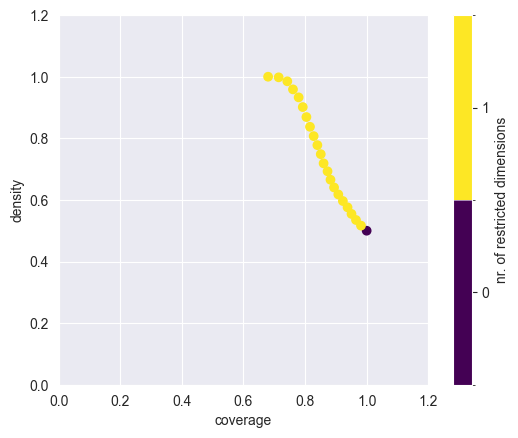

In [19]:
# Display the trade-off curve between coverage and density, save the plot, and show it
box1.show_tradeoff()
plt.savefig('./img/subspace_discovery_damage.png')
plt.show()

The PRIM trade-off plot shows the balance between coverage (the proportion of high-risk scenarios captured) and density (the proportion of scenarios within the subspace that are high-risk), with the curve indicating that increasing coverage generally reduces density.

The top-left point on the curve represents a subspace with the highest density (approximately 1), meaning almost all scenarios within this subspace are high-risk. However, it has low coverage, indicating that it captures only a small portion of the total high-risk scenarios.
As we move along the curve to the right, coverage increases, meaning more high-risk scenarios are included. However, density decreases, indicating that the subspace now contains a mix of high-risk and low-risk scenarios.
This trade-off curve helps in selecting an optimal subspace that balances coverage and density according to the transport company's risk management priorities. For example, a point with moderate coverage and high density might be chosen to ensure that a significant portion of high-risk scenarios is captured without diluting the subspace with too many low-risk scenarios.

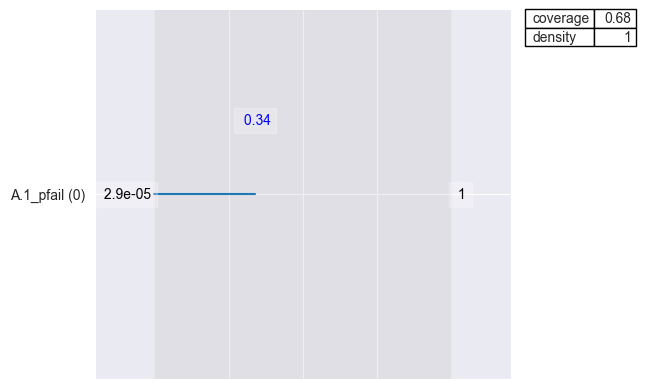

In [20]:
# Inspect the identified PRIM box using a graphical representation, save the plot, and display it
box1.inspect(style='graph')
plt.savefig('./img/scatter1.png')
plt.show()

The plot identifies the critical subspace of concern, defined by the probability of failure in dike A1 (`A1_pfail`) ranging from 2.9e-05 to 1. This subspace captures 68% of the high-risk scenarios, meaning scenarios with Total Expected Annual Damage above the 50th percentile, and shows perfect classification accuracy (density = 1), indicating all scenarios within this subspace are high-risk. This highlights the significant impact of `A1_pfail` on expected annual damage, suggesting that as transport company we should focus on mitigating the probability of failure in dike A1 within this range to effectively reduce the risk of substantial damages and ensure the reliability of transport operations along the IJssel River.

#### 2.2 Total Expected Number of Deaths

In [21]:
# Initialize the PRIM algorithm to find the subspace where Total Expected Number of Deaths exceeds the 90th percentile with at least 80% density of high-risk scenarios
x = cleaned_experiments
y = outcomes['Total_Expected_Number_of_Deaths'] > np.percentile (outcomes['Total_Expected_Number_of_Deaths'], 90)
prim_alg = prim.Prim(x, y, threshold=0.8)
box2 = prim_alg.find_box()

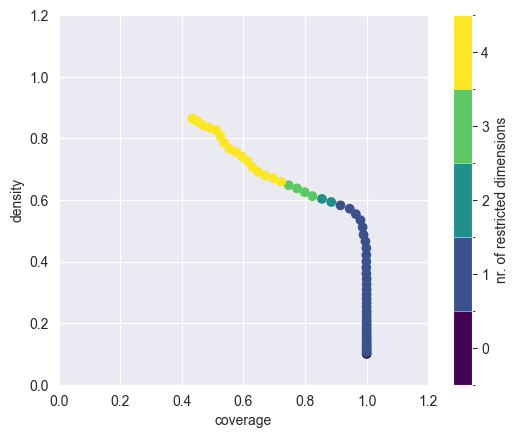

In [22]:
# Display the trade-off curve between coverage and density for Total Expected Number of Deaths, save the plot, and show it
box2.show_tradeoff()
plt.savefig('./img/subspace_discovery_death.png')
plt.show()

The plot illustrates the balance between coverage and density for scenarios where the Total Expected Number of Deaths exceeds the 90th percentile. Points on the top-left of the curve represent subspaces with the highest density, meaning almost all scenarios within these subspaces are high-risk but have lower coverage, capturing only a small portion of the total high-risk scenarios. As coverage increases along the curve, density decreases, indicating the inclusion of more low-risk scenarios.

The color scale shows that subspaces with fewer restricted dimensions (yellow) have higher densities, while those with more restricted dimensions (darker colors) have lower densities. This implies that broader subspaces, defined by fewer restrictions, tend to include more low-risk scenarios.

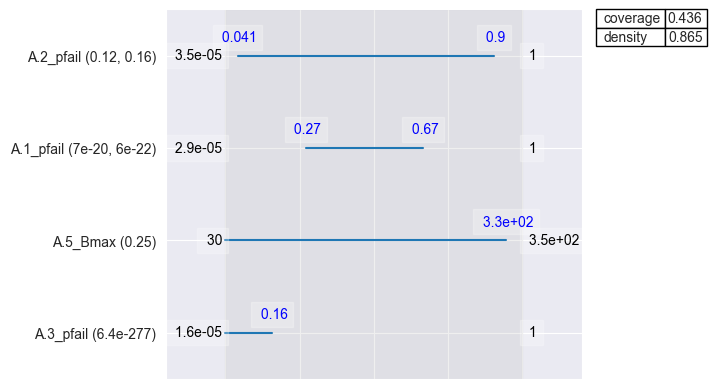

In [23]:
box2.inspect(style='graph')
plt.savefig('./img/scatterbox2.png')
plt.show()

The PRIM box inspection plot reveals that the subspace of concern is defined by specific ranges of the uncertainty variables A2_pfail, A1_pfail, A5_Bmax, and A3_pfail. Within these ranges, the subspace captures 43.6% of the scenarios where the Total Expected Number of Deaths exceeds the 90th percentile, and 86.5% of the scenarios within this subspace are high-risk.

This plot highlights the critical uncertainty variables and their respective ranges that significantly impact the Total Expected Number of Deaths. For the transport company, focusing on mitigating the probabilities of failure in dikes A1, A2, and A3, as well as managing the maximum water level in dike A5, within the specified ranges can effectively reduce the risk of high fatalities. This insight is crucial for developing targeted strategies to ensure the safety of transport operations along the IJssel River.

As mentioned above, Total Expected Annual Damage and Total Expected Number of Deaths correlate to each other, therefore we choose to focus on the Total Expected Number of Deaths because we value safety and security. 

In [24]:
sns.set_style('whitegrid')

It looks like PRIM discovered one or two boxes that satisfy by having both a decent coverage and density. We can inspect numerically:

In [25]:
# Filter the peeling trajectory to identify and display the subspace (box) with the highest density of high-risk scenarios
candidates = box2.peeling_trajectory
candidates = candidates[candidates.density
                      == candidates.density.max()]
candidates

,coverage,density,id,k,mass,mean,n,res_dim
59,0.436,0.865079,59,436,0.0504,0.865079,504,4


The filtered PRIM results identify the subspace with the highest density of high-risk scenarios, detailing the specific ranges of critical uncertainties that most significantly impact the Total Expected Number of Deaths.

In [26]:
# Select the best subspace (box) with the highest density from the PRIM algorithm and retrieve its index
best_box_idx = int(candidates.index[0])

box2.select(best_box_idx)
best_box_idx

59

The index 59 represents the selected subspace in the PRIM algorithm, which is identified as the most critical subspace with the highest density of high-risk scenarios for Total Expected Number of Deaths.

In [27]:
# Retrieve and display the limits (ranges of uncertainty variables) for the selected subspace (box) with the highest density
limits = box2.box_lims[best_box_idx]
limits

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,0,30.013731,"{1.5, 10.0, 1.0}",0.270181,30.011414,"{1.0, 10.0, 1.5}",0.041425,30.004852,"{1.0, 10.0, 1.5}",0.000016,30.014145,"{1.5, 10.0, 1.0}",0.000084,30.025913,"{1.0, 10.0, 1.5}",0.000085,"{1.5, 2.5, 3.5, 4.5}","{1.5, 2.5, 3.5, 4.5}","{1.5, 2.5, 3.5, 4.5}"
1,132,349.989200,"{1.5, 10.0, 1.0}",0.665128,349.979672,"{1.0, 10.0, 1.5}",0.903463,349.985250,"{1.0, 10.0, 1.5}",0.157080,349.985580,"{1.5, 10.0, 1.0}",0.999941,332.550198,"{1.0, 10.0, 1.5}",0.999985,"{1.5, 2.5, 3.5, 4.5}","{1.5, 2.5, 3.5, 4.5}","{1.5, 2.5, 3.5, 4.5}"


One could do further iterations of the PRIM algorithm using the selected box as a starting point. We played around with this process, but it didn't produce any more meaningful results than the first round of space peeling.

--------------------------

## 3. Filter, Sort, and Save Outputs

Having now defined a "region of concern" within the uncertainty space, we can select the subset of scenarios from our original design of experiments that falls within this space. Notably, this is different than selecting the subset of scenarios that fails our performance threshold; this will include cases of lesser concern that fall in the box and cases of high concern that are not included in the box. However, this is done because we can use this same bounding box later on to constrict the uncertainty space without even needing to know the results of the initial experiments. Since we will move forward with this PRIM box, we will filter the scenario list with it now.

In [28]:
# Create a new dataframe of experiments & their outcomes
# and track whether they fall outside the PRIM box boundary
combined_df = experiments.copy()
for key in outcomes:
    combined_df[key] = outcomes[key]

combined_df['Within Limit'] = True

print(combined_df.shape)
combined_df.head(3)

(10000, 73)


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A4_Dike_Investment_Costs,A4_Expected_Number_of_Deaths,A5_Expected_Annual_Damage,A5_Dike_Investment_Costs,A5_Expected_Number_of_Deaths,RfR Total Costs,Total_Expected_Annual_Damage,Total_Dike_Investment_Costs,Total_Expected_Number_of_Deaths,Within Limit
0,27,109.980421,10.0,0.949842,113.333813,10.0,0.987398,102.837734,1.0,0.371209,...,0,0.03386,0.0,0,0.0,0.0,5.374421e+08,0,1.202328,True
1,69,167.755342,1.5,0.095852,258.851784,10.0,0.234429,239.613433,10.0,0.182672,...,0,0.00000,0.0,0,0.0,0.0,3.727820e+09,0,2.244549,True
2,71,121.808348,1.5,0.017500,339.112507,10.0,0.848583,79.000247,1.5,0.224383,...,0,0.00000,0.0,0,0.0,0.0,3.066420e+09,0,2.293143,True


In [29]:
# Apply PRIM constraint in each dimension
for idx, row in combined_df.iterrows():
    for unc in limits:
        if (type(limits.loc[0, unc]) == set):
            if row[unc] not in limits.loc[0, unc]:
                combined_df.at[idx, 'Within Limit'] = False
        else:
            if row[unc] < limits.loc[0, unc] or row[unc] > limits.loc[1, unc]:
                combined_df.at[idx, 'Within Limit'] = False

In [30]:
# Use new column to filter the rows, then drop this column
combined_df = combined_df[combined_df['Within Limit']]
combined_df = combined_df.drop(['Within Limit'], axis=1)
print(f'{combined_df.shape[0]} scenarios remain in the PRIM box.')

504 scenarios remain in the PRIM box.


In this section, we filter the original set of scenarios to select those that fall within the "region of concern" defined by the PRIM box. By combining the original experiments and their outcomes into a new dataframe and applying the constraints of the PRIM box to each scenario, we identify which scenarios lie within the specified subspace of high-risk uncertainties. This process includes scenarios that are not high-risk but fall within the box and high-risk scenarios outside the box. After applying the constraints to each dimension, the dataframe is filtered to retain only those scenarios that meet all the PRIM box criteria. The result shows that out of the initial 10,000 scenarios, 504 remain within the PRIM box. This refined subset of scenarios represents a focused set of high-risk conditions that will be used for further analysis and policy evaluation, ensuring that our subsequent steps target the most critical uncertainties affecting the Total Expected Number of Deaths.

In [31]:
# Sort the filtered dataframe of scenarios by the outcome of interest (ooi) in descending order and display the top 3 scenarios
combined_df = combined_df.sort_values(by=ooi, ascending=False)
combined_df.head(3)

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A4_Expected_Annual_Damage,A4_Dike_Investment_Costs,A4_Expected_Number_of_Deaths,A5_Expected_Annual_Damage,A5_Dike_Investment_Costs,A5_Expected_Number_of_Deaths,RfR Total Costs,Total_Expected_Annual_Damage,Total_Dike_Investment_Costs,Total_Expected_Number_of_Deaths
8153,59,36.815577,10.0,0.295448,280.784034,1.5,0.720120,48.595340,1.5,0.034560,...,4.750428e+07,0,0.014812,0.0,0,0.0,0.0,6.265018e+09,0,4.982377
9432,25,151.446572,1.5,0.293265,169.586652,10.0,0.084391,258.404539,10.0,0.006790,...,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,5.940507e+09,0,4.925730
9137,53,31.014907,1.5,0.290055,138.688528,1.0,0.725694,298.701780,1.0,0.107705,...,0.000000e+00,0,0.000000,0.0,0,0.0,0.0,5.721402e+09,0,4.963287


In [32]:
# Display the column names of the filtered and sorted dataframe
combined_df.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1',
       'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1',
       'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1',
       'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1',
       'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1',
       'A.5_DikeIncrease 2', 'scenario', 'policy', 'model',
       'A1_Expected_Annual_Damage', 'A1_Dike_Investment_Costs',
       'A1_Expected_Numbe

In [33]:
# Save the result file
output_filename ='./output/results__prim_filtered.csv'
combined_df.to_csv(output_filename, index=True)